# INTRODUCTION

- Name : Firman Syah
- Batch : BSD 007
- Objective : This project is aiming to predict possibility of costumers that offered a bank deposit product to say yes or no.
- URL : https://huggingface.co/spaces/firmandatascience/bank.campaign


- Problem statement : How to increase 50% of the deposit product sales in a Bank by selecting the potential costumer databases by defining posibility answer based on the costumers' characteristics.

- Model brief info : This project will try 5 different classification models to fine the best one. After that, we will look for the best hyperparameters by tuning method to get best combination parameters. To evaluate the model, we decided to user precision score of each models because we are going to avoid false positive values on this project.

# 2. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import joblib
!pip install phik
from phik.report import plot_correlation_matrix
from phik import resources, report



# 3. DATA LOADING

In [2]:
# load data from csv to pandas dataframe
data = pd.read_csv('bank-full.csv', sep=';') 
# Copy data to new dataframe df
df = data.copy()
# print the first 5 rows of the dataframe
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


The five first rows showed.

In [3]:
# Print the last 5 rows of the dataframe
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


The five last rows showed.

Column Description
- age : Age
- job : Job
- Marital : Marital Status
- eductaion : The last eductaion level attended
- default : Failure to meet the legal obligations (or conditions)
- balance : The last balance costumer has
- housing : Mortgage status
- contact : Type of communication
- day : date of last communication
- month : month of last communication
- duration : last duration of communication in seconds
- campaign : number of campaign offered
- pdays : number of contacts performed before this campaign and for this client	
- previous : outcome of the previous marketing campaign
- Poutcome : last status of communication
- y : the confirmation of bank deposit offer



This description is defined by me based on the related information in the banking industry. The colums that have no information that can be define clearly will be dropped in the column drop section.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The df has 17 coulmns and 45211 rows.

In [5]:
# Cek the missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing value detected.

In [6]:
# Cek duplicate values
df.duplicated().sum()

0

No duplicated data.

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Check the result
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Clear.

In [9]:
# Recheck df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


clear.

In [10]:
# Check the imbalance data
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

It is categorized as immbalanched data. However, we decide to not handle it.

# 4. EDA

## EDA 1 Costumer Education level

<Axes: ylabel='count'>

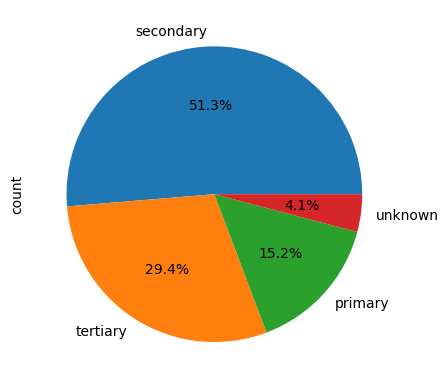

In [11]:
# Education variation in costumers
df['education'].value_counts()

# show the unique values of the education column in pie chart
df['education'].value_counts().plot.pie(autopct='%1.1f%%')


I can be seen that more than a half of costumers obtained the secondary education level based on data frame. While those in primary and tertiary are 15.2% and 29.4% respectively.

## EDA 2 Default Costumer Rates

<Axes: xlabel='default'>

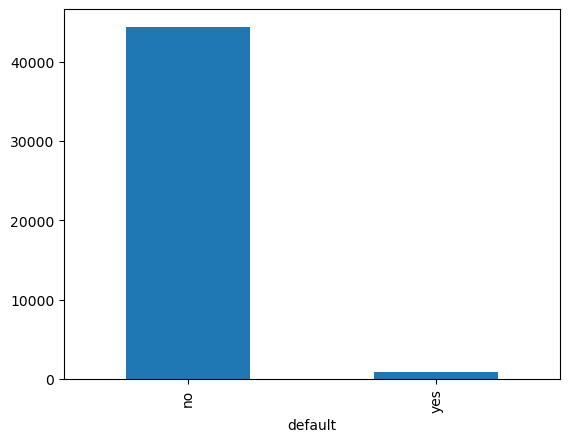

In [12]:
# Compare value the default column
df['default'].value_counts()
# making percentage of the default column
df['default'].value_counts(normalize=True)
# show in bar chart
df['default'].value_counts().plot.bar()

In general, the bank costumers are in good credit rating. The cahrt depics that no more than 2% of costumers categorized as default costumers while the treshold of non-performing loan or default is 3% in banking industry.

## EDA 3 Prefered Line Communication among the Age Group

/var/folders/__/d344prxd0w3f00zby7ngrbjh0000gn/T/ipykernel_6204/2635048482.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['contact'].value_counts(normalize=True).unstack().plot.bar(stacked=True)


<Axes: xlabel='age_group'>

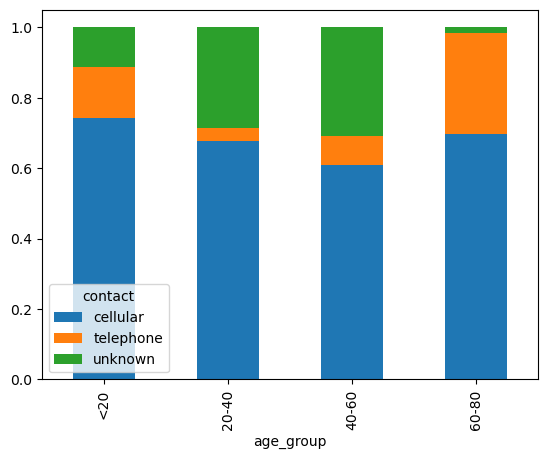

In [13]:
# get only colum age and contact
df[['age', 'contact']]

# group age into 4 categories
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80], labels=['<20', '20-40', '40-60', '60-80'])

# show the distribution of age group by contact
df.groupby('age_group')['contact'].value_counts(normalize=True).unstack().plot.bar(stacked=True)

This chart shows how telephone line dominates in costumer's age group of 60-80.

## EDA 4 Housing vs Loan

<Axes: xlabel='loan'>

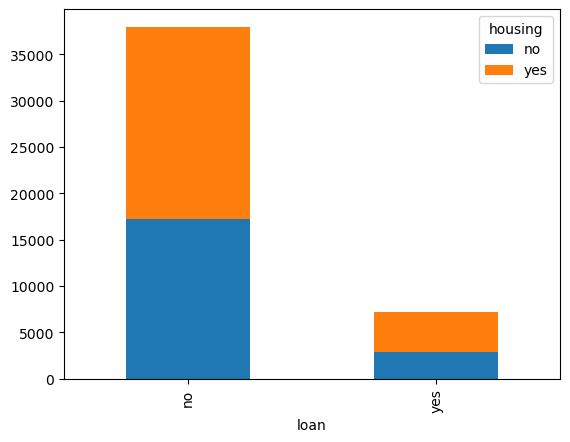

In [14]:
# get column loan and housing
df[['loan', 'housing']]

# making crosstab between loan and housing
pd.crosstab(index=df['loan'], columns=df['housing'])

# visualize the crosstab
pd.crosstab(index=df['loan'], columns=df['housing']).plot.bar(stacked=True)

The chart shows that in general, people who has no mortgage will has no credit at the same time.

## EDA 5 Deposit Sales in Age Group

/var/folders/__/d344prxd0w3f00zby7ngrbjh0000gn/T/ipykernel_6204/3427871446.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('balance_group')['y'].value_counts(normalize=True).unstack().plot.bar(stacked=True)


<Axes: xlabel='balance_group'>

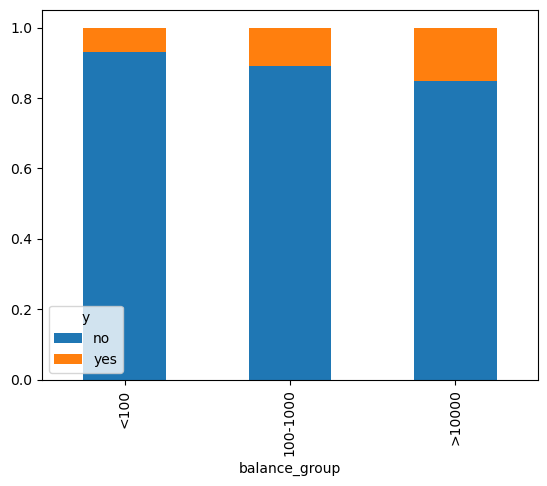

In [15]:
# get column balance and y
df[['balance', 'y']]

# define balance group into 3 categories
df['balance_group'] = pd.cut(df['balance'], bins=[-10000, 0, 1000, 10000], labels=['<100', '100-1000', '>10000'])

# show the distribution of balance group by y
df.groupby('balance_group')['y'].value_counts(normalize=True).unstack().plot.bar(stacked=True)


This chart shows that costumers with high monthly balance average have more change to accept the deposit product offers.

## EDA 6 Distribution load in marital status

<Axes: xlabel='marital'>

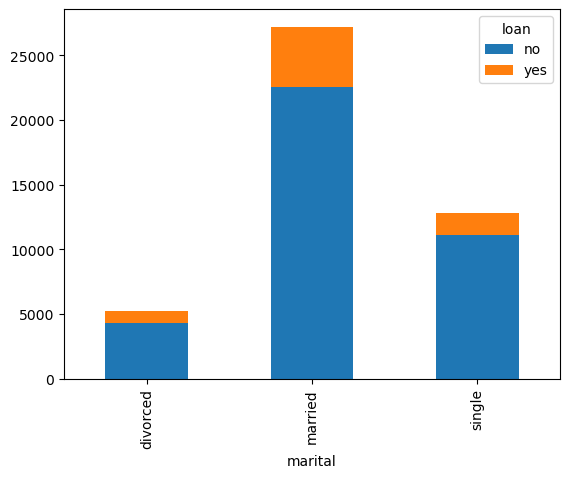

In [16]:
# get column marital and loan
df[['marital', 'loan']]

# making crosstab between marital and loan
pd.crosstab(index=df['marital'], columns=df['loan'])

# visualize the crosstab with bar chart
pd.crosstab(index=df['marital'], columns=df['loan']).plot.bar(stacked=True)

The data indicates that married costumers contributes loan distribution in that Bank. 

## EDA 7 Correlation 'balance' vs 'age'

In [17]:
# Checking correlation between balance and age
# Calculate the correlation score
df['balance'].corr(df['age'])

0.09778273937134753

This score show that the relationship between age and balance is very low.

# 5. FEATURE ENGINEERING

## Data Spliting

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_group', 'balance_group'],
      dtype='object')

In [19]:
# Split the data into features and target
X = df.drop(['y','age_group', 'balance_group'], axis=1)
y = df['y']


df has been splitted.

In [20]:
# Split the data into training and testing data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #stratify=y to make sure the distribution of the target is the same in both training and testing data

# Print the shape of the training and testing data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (36168, 16)
X_test shape: (9043, 16)


Data of train and test splitted.

## Feature selection

In [21]:
# Calculate the phik matrix
phik_data = pd.concat([X_train, y_train], axis=1)
corr_matrix = phik_data.phik_matrix()
corr_matrix

interval columns not set, guessing: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.509030,0.480054,0.224085,0.024469,0.187515,0.299041,0.083652,0.264752,0.103578,0.225084,0.042389,0.040079,0.112994,0.000000,0.111760,0.205438
job,0.509030,1.000000,0.415886,0.772835,0.040286,0.077409,0.365653,0.138651,0.318045,0.101833,0.360791,0.027608,0.027892,0.103037,0.000000,0.137963,0.176248
marital,0.480054,0.415886,1.000000,0.128366,0.012040,0.025064,0.011834,0.030885,0.140284,0.041107,0.153542,0.024948,0.000000,0.048082,0.000000,0.030229,0.040813
education,0.224085,0.772835,0.128366,1.000000,0.025151,0.077244,0.174040,0.119016,0.128140,0.069746,0.227698,0.000000,0.019780,0.077821,0.015066,0.088972,0.104740
default,0.024469,0.040286,0.012040,0.025151,1.000000,0.060570,0.000000,0.124763,0.013795,0.011214,0.072712,0.000000,0.008809,0.044383,0.000000,0.057326,0.036993
balance,0.187515,0.077409,0.025064,0.077244,0.060570,1.000000,0.075517,0.100180,0.062602,0.096368,0.139194,0.000000,0.000000,0.074245,0.000000,0.038369,0.080587
housing,0.299041,0.365653,0.011834,0.174040,0.000000,0.075517,1.000000,0.067261,0.129954,0.169436,0.640337,0.000000,0.031404,0.217335,0.009831,0.216053,0.216993
loan,0.083652,0.138651,0.030885,0.119016,0.124763,0.100180,0.067261,1.000000,0.010558,0.050787,0.234084,0.019172,0.013751,0.040564,0.014021,0.083670,0.103800
contact,0.264752,0.318045,0.140284,0.128140,0.013795,0.062602,0.129954,0.010558,1.000000,0.143059,0.789190,0.057216,0.048358,0.315231,0.005418,0.216841,0.090414
day,0.103578,0.101833,0.041107,0.069746,0.011214,0.096368,0.169436,0.050787,0.143059,1.000000,0.594210,0.028356,0.165026,0.237185,0.010477,0.134696,0.097112


Based on the Phik Correlaton check we did in the google collab (because thes laptop is not supported), we defind that features that have score more than 0.1 will be included in the models. the variables are:
Features : 'age', 'job','education','housing','loan','month', 'duration',  'pdays', 'poutcome',

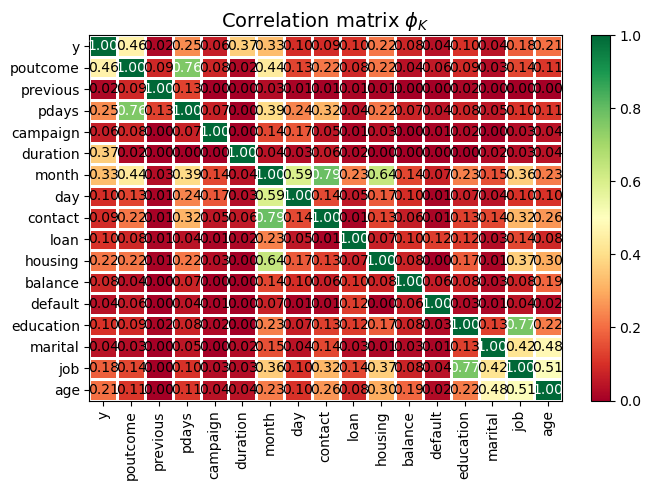

In [22]:
# making Heatmap of the correlation matrix from phix
plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, 
                        title=r'Correlation matrix $\phi_K$', vmin=0, vmax=1)

In [23]:
# Drop the columns not inclunding in the model
X_train = X_train.drop(['marital', 'default', 'balance', 'contact', 'day', 'campaign','previous'], axis=1)
X_test = X_test.drop(['marital', 'default', 'balance', 'contact', 'day', 'campaign','previous'], axis=1)

In [24]:
# Define the numerical and categorical columns
num_col = ['age', 'duration',  'pdays']
cat_col = ['job','education','housing','loan','month','poutcome']

## Cardinality

In [25]:
# Check unique values in the categorical columns
for col in cat_col:
    print(f'{col}: {X_train[col].unique()}')

job: ['technician' 'student' 'unemployed' 'blue-collar' 'management' 'services'
 'admin.' 'retired' 'unknown' 'entrepreneur' 'housemaid' 'self-employed']
education: ['secondary' 'tertiary' 'primary' 'unknown']
housing: ['no' 'yes']
loan: ['no' 'yes']
month: ['aug' 'apr' 'jul' 'feb' 'jun' 'may' 'nov' 'mar' 'oct' 'jan' 'sep' 'dec']
poutcome: ['unknown' 'failure' 'other' 'success']


- Ordinal : 'job', 'education','month'
- Nominal : 'housing', 'loan'


In [26]:
# Handling cardinality in the categorical columns
# Drop the columns with high cardinality
X_train = X_train.drop(['job', 'month'], axis=1)
X_test = X_test.drop(['job', 'month'], axis=1)

## Outlier Handling

In [27]:
# Check the skewness of the numerical columns in X_train
for col in num_col:
    print(f'{col} : {skew(X_train[col])}')

age : 0.6937096828939421
duration : 3.210748782406444
pdays : 2.6161895225525305


the skeweness are high in duration and pdays

In [28]:
# Capping the outliers in numerical columns with normal distribution
# Capping the outliers in moderate values
Winsorizer_age = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['age'])
Winsorizer_age.fit(X_train)
X_train = Winsorizer_age.transform(X_train)
X_test = Winsorizer_age.transform(X_test)

# Capping the outliers in numerical columns with IQR
## capping the outliers in extreme values
Winsorizer_balance = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['duration'])
Winsorizer_balance.fit(X_train)
X_train = Winsorizer_balance.transform(X_train)
X_test = Winsorizer_balance.transform(X_test)

# Note : pdays column has low variance, so we will not handle the outliers in this column


In [29]:
# Check the skewness of the numerical columns in X_train after capping the outliers
for col in num_col:
    print(f'{col} : {skew(X_train[col])}')

age : 0.5383567688321623
duration : 1.663709582938532
pdays : 2.6161895225525305


the skeweness scores are better.

## Scaling and Encoding

In [30]:

# spliting categorical columns into nominal and ordinal
nominal_columns = ['housing', 'loan'] 
ordinal_columns = ['education','poutcome']  
# Spliting numerical columns into high skewness and low skewness
high_skewness = ['pdays', 'duration'] # standar
low_skewness = ['age']                  # minmax

- balance and duration are very skewed, they will be handled with robustscaller
- age is little skewed, we will use standardscaller
- nominal columns will be handled with onehotencoder
- catregorical columns will be processed by ordinalencoder


In [31]:
# Making pipeline for preprocessing the data scaling the numerical columns and encoding the categorical columns
# Create 'making pipeline' for preprocessing the data
numerical_pipeline1 = make_pipeline(StandardScaler())
numerical_pipeline2 = make_pipeline(RobustScaler())
categorical_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
categorical_pipeline2 = make_pipeline(OrdinalEncoder(categories=[['unknown','primary','secondary', 'tertiary'],['unknown','other','failure','success']])) # atur urutan ordinal seusai urutan yang kecil ke besar. buat list seaui index columnya

# Create 'ColumnTransformer' for preprocessing the data
preprocessor = ColumnTransformer(transformers=[
    ('numerical1', numerical_pipeline1, low_skewness),
    ('numerical2', numerical_pipeline2, high_skewness),
    ('categorical1', categorical_pipeline1, nominal_columns),
    ('categorical2', categorical_pipeline2, ordinal_columns),
    ], remainder='drop')
# Print
preprocessor

ColumnTransformer(transformers=[('numerical1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age']),
                                ('numerical2',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['pdays', 'duration']),
                                ('categorical1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['housing', 'loan']),
                                ('categorical2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary'],
                                                                             ['unknown',
                                                                              'other',
                                                                              'failure',
                                                                              'success']]))]),
                                 ['education', 'poutcome'])])

In [32]:
# Fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numerical1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age']),
                                ('numerical2',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['pdays', 'duration']),
                                ('categorical1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['housing', 'loan']),
                                ('categorical2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary'],
                                                                             ['unknown',
                                                                              'other',
                                                                              'failure',
                                                                              'success']]))]),
                                 ['education', 'poutcome'])])

In [33]:
# Transform the training and testing data
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [34]:
pd.DataFrame(X_train_preprocessed).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       36168 non-null  float64
 1   1       36168 non-null  float64
 2   2       36168 non-null  float64
 3   3       36168 non-null  float64
 4   4       36168 non-null  float64
 5   5       36168 non-null  float64
 6   6       36168 non-null  float64
 7   7       36168 non-null  float64
 8   8       36168 non-null  float64
dtypes: float64(9)
memory usage: 2.5 MB


In [35]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


# 6. MODELING

## Model Defining and Training

In [36]:
# Try 5 different models (KNN,SVM, Decision Tree, Random Forest, Gradient Boosting) without hyperparameter tuning in make_pipeline
# Create the models WITHOUT hyperparameter tuningIN make_pipeline
model_knn = make_pipeline(preprocessor, KNeighborsClassifier())
model_svm = make_pipeline(preprocessor, SVC())
model_dt = make_pipeline(preprocessor, DecisionTreeClassifier())
model_rf = make_pipeline(preprocessor, RandomForestClassifier())
model_gb = make_pipeline(preprocessor, GradientBoostingClassifier())

In [37]:
X_train

,age,education,housing,loan,duration,pdays,poutcome
24001,36.0,secondary,no,no,140,-1,unknown
43409,24.0,secondary,no,no,907,185,failure
20669,44.0,secondary,yes,no,963,-1,unknown
18810,48.0,secondary,no,no,35,-1,unknown
23130,38.0,secondary,no,no,57,-1,unknown
...,...,...,...,...,...,...,...
17958,50.0,secondary,yes,no,58,-1,unknown
15941,36.0,secondary,yes,no,77,-1,unknown
16952,45.0,secondary,yes,no,98,-1,unknown
34781,27.0,tertiary,yes,no,227,-1,unknown


In [38]:
# create cross validation with 5 fold in make_pipeline
cv_model_knn = cross_val_score(model_knn, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision')
cv_model_svm = cross_val_score(model_svm, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision')
cv_model_dt = cross_val_score(model_dt, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision')
cv_model_rf = cross_val_score(model_rf, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision')
cv_model_gb = cross_val_score(model_gb, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
# Find the average precision score and standard deviation of the precision score for each model
print('KNN Precision Score:', cv_model_knn.mean(), '+-', cv_model_knn.std())
print('SVM Precision Score:', cv_model_svm.mean(), '+-', cv_model_svm.std())
print('Decision Tree Precision Score:', cv_model_dt.mean(), '+-', cv_model_dt.std())
print('Random Forest Precision Score:', cv_model_rf.mean(), '+-', cv_model_rf.std())
print('Gradient Boosting Precision Score:', cv_model_gb.mean(), '+-', cv_model_gb.std())



KNN Precision Score: 0.5261123806131568 +- 0.014458045797850658
SVM Precision Score: 0.3800983227299017 +- 0.213872914134762
Decision Tree Precision Score: 0.394810101139873 +- 0.005628089291470726
Random Forest Precision Score: 0.5238775178140734 +- 0.01751873514224262
Gradient Boosting Precision Score: 0.6378458744682564 +- 0.02977561810597983


It can be decided that Gradient Boosting is the best to use in thi project.

## Hyperparameter Tuning

In [40]:
# Define the hyperparameter : Random Search with best model (gradient boosting)

# Create the hyperparameter grid
param_gb = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__max_depth': [3, 5, 7],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2]
}

# Train the model with hyperparameter tuning
grid_search_gb = GridSearchCV(model_gb, param_gb, cv=StratifiedKFold(n_splits=5), scoring='precision', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age']),
                                                                        ('numerical2',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['pdays',
                                                                          'duration']),
                                                                        ('categorical1',
                                                                         Pipeline(steps=[...
                                                                                                                      'tertiary'],
                                                                                                                     ['unknown',
                                                                                                                      'other',
                                                                                                                      'failure',
                                                                                                                      'success']]))]),
                                                                         ['education',
                                                                          'poutcome'])])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.01,
                                                                       0.1,
                                                                       0.2],
                         'gradientboostingclassifier__max_depth': [3, 5, 7],
                         'gradientboostingclassifier__n_estimators': [100, 200,
                                                                      300]},
             scoring='precision')

In [41]:
# Get best hyperparameter
grid_search_gb.best_params_

# Get Performance of the best model
best_model_gb = grid_search_gb.best_estimator_

# Get the precision and standar deviation score of the best model in X_train
cv_best_model_gb = cross_val_score(best_model_gb, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision')
print('Best Model Gradient Boosting Precision Score:', cv_best_model_gb.mean(), '+-', cv_best_model_gb.std())

Best Model Gradient Boosting Precision Score: 0.7963116844552047 +- 0.04054275528505122


After tuning, the score is better than before.

In [42]:
# Get the precision and standar deviation score of the best model in X_test
y_pred = best_model_gb.predict(X_test)
precision = precision_score(y_test, y_pred)
print('Best Model Gradient Boosting Precision Score in X_test:', precision)

Best Model Gradient Boosting Precision Score in X_test: 0.8222222222222222


The test percision score are better than training with gap 3%. It shows that the model is in 'Good Fit' category.

In [43]:
# Model Evaluation
# Calculate the accuracy, precision, recall, and f1 score of the best model in X_test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Print false positive and false negative percentage
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))
print('False Positive:', fp)
print('False Negative:', fn)

# Print false positive and false negative percentage
fp_percentage = (fp / len(y_test)) * 100
fn_percentage = (fn / len(y_test)) * 100
print('False Positive Percentage:', fp_percentage, '%')
print('False Negative Percentage:', fn_percentage, '%')



Accuracy: 0.8894172287957536
Precision: 0.8222222222222222
Recall: 0.06994328922495274
F1 Score: 0.1289198606271777
False Positive: 16
False Negative: 984
False Positive Percentage: 0.17693243392679422 %
False Negative Percentage: 10.881344686497844 %


the percentage of FP score is 0,17% which is good but we can increase it into near 0% to boost the performance in the future. However, the high number on False Negative which is 984 data indicates that the model frequently identify wrong classification that should be yes but detected as no. This concern should be taken into account to the future improvment.

## Model Saving

In [44]:
# Saving model and winsorizer with pickle
import pickle
with open('best_model_gb.pkl', 'wb') as model_file1:
    pickle.dump(best_model_gb, model_file1)
with open('Winsorizer_age.pkl', 'wb') as model_file2:
    pickle.dump(Winsorizer_age, model_file2)
with open('Winsorizer_balance.pkl', 'wb') as model_file3:
    pickle.dump(Winsorizer_balance, model_file3)

# 7. Conclusion

In [45]:
X_train.columns


Index(['age', 'education', 'housing', 'loan', 'duration', 'pdays', 'poutcome'], dtype='object')

- EDA : In general, the costumer demography information that we can conclude from the initial data exploration are :
1. Almost 30% of the costumers are universitu graduate, while a half of the is obtaining high school certificate.
2. The costumers credit score is above the industry average which is no more than 3% of default costumers.
3. The most telephone line communication is found in 60-80 costumer's age group.
4. People with mortgage liabilities mostly have loan or credit at the same time.
5. Costumers classified as high balance have more chance to buy the deposit product.
6. Distribution of loan are centered in married costumers.
7. The correlation between costumer's age and their balance are verry low.

- Model : In conclusion, the summary of the model used are:

In the feature selection part, we checked the correlation with phik corr score and defined 0,1 as the treshold. This step will eleminate the variables that have correlation score less than 0.1 and the result is that there were nine variables selected ('age', 'education', 'housing', 'loan', 'duration', 'pdays', 'poutcome','job','month'). The next step is check the cardinality, in this process we decided to drop 'job' and 'month' columns because it has high cardinality by checking the unique values in each column.

After defining seven variables ('age', 'education', 'housing', 'loan', 'duration', 'pdays', 'poutcome') as the indicators used to predict the classification the costumer possible answer of deposit offfer. We trained the data in five different models (KNN,SVM, Decision Tree, Random Forest, Gradient Boosting) to find the best performance based on average precision and standard deviation scores. By this step, the Gradient Boosting is the best one with precision and standard deviation score are 0.63 (63%) and 0.029 respectively.

To increase the score of the best model (GB), we conducted hyperparameter tuning to find maximum parameters and apply them into the model. this process produced learning_rate': 0.01, max_depth': 3, and n_estimators': 100 as the best parameter combination to apply in the model. After apply them to the model, the result is Precision Score became 0.79 (79%) and Standard Deviation 0.04. It did increase the scores.

To evaluate the final performance, we will compare the last score of precision in train data and in test data. The result shows that train is 79% and the test is 82%. The test score is higher than the train score with gap 3% between them makes we classifying the model as a 'good fit' one.

However, the drawback of this model is the model frequently wrong detection in 'No' classification. It can be seen on the high value of False Negative results which is around 10%. While the advantage of the model is that model have a good score in accuracy and precision. It indicates that in general and in positive result, the model can predict correctly.

The last, to improve the model in the future, since the recall score is 12%, we suggest to improve the recall score by handling imbalance data to optimise the score of precision with no trade-off with the recall score in the future time.

# 8. Question

1. Bagging process is to reduce the variability in prediction process because the data sets have different variation. Baging process starts to take a train set from the initial data and to split the data into several data set from the initial one. The model will be applied into each train set to gain the result. Lastly, the results of the model each set will be collected and define the mean for regression model.

2. The main difference of RF and GB : First, the  decisionntree development, while the RF randomly builds the trees, the GB paralely bulid the trees. This method will also lead to the second difference, while RF focuses on how to reduce the variance, the GB focuses on how to minimise the bias. 

3. Cross Validation is the method that making an internal validation in trian set. The train data will be splited into several sets (how many folds) that are used to validate and train with different data variation. It helps ML to increase the accuracy and reduce overfitting.